In [2]:
import numpy as np
import pickle
import pandas as pd
import re
from tqdm import tqdm

In [3]:
with open('user2Vis.pkl','rb') as f:
	user2Vis=pickle.load(f)
with open('configAll.pkl','rb') as f:
	configAll=pickle.load(f)
with open('user2AttrAll.pkl','rb') as f:
	user2AttrAll=pickle.load(f)
with open('attr2vec.pkl','rb') as f:
	attr2vec=pickle.load(f)
with open('userLikeATTR.pkl','rb') as f:
	userLikeATTR=pickle.load(f)
with open('userLikeCFG.pkl','rb') as f:
	userLikeCFG=pickle.load(f)

In [4]:
configAll

['candlestick',
 'box',
 'scatter3d',
 'bar',
 'bin',
 'histogram',
 'scattergl',
 'heatmap',
 'scatter',
 'contour']

In [5]:
n_cfg=len(configAll)
t=0
repeat=1
n_rounds=200
comb_ratio_list=[]
reward_ratio_list=[]
false_ratio_list=[]
for user,visList in user2Vis.items():
	if user in user2AttrAll.keys():
		attrList=user2AttrAll[user]
		if len(attrList)<20:
			arms = attrList
			# print(attrList)
			n_arms=len(arms)
			rewards=np.zeros((n_cfg,n_arms,n_arms))
			CFG_reward=np.zeros(n_cfg)
			ATTR_reward=np.zeros((n_arms,n_arms))
			for c in range(n_cfg):
				for i in range(n_arms):
					for j in range(n_arms):						
						if ((arms[i],arms[j],configAll[c]) in visList):
							rewards[c][i][j]=1	
			comb_num=len(userLikeCFG[user])*(len(userLikeATTR[user])**2)
			reward_num=np.sum(rewards)
			all_num=n_cfg*len(attrList)**2
			comb_ratio_list.append(comb_num/all_num)
			reward_ratio_list.append(reward_num/all_num)
			false_ratio_list.append((comb_num-reward_num)/comb_num)
print(np.mean(np.array(comb_ratio_list)))
print(np.mean(np.array(reward_ratio_list)))
print(np.mean(np.array(false_ratio_list)))

0.26752002279900955
0.015964319964737406
0.6894136725147858


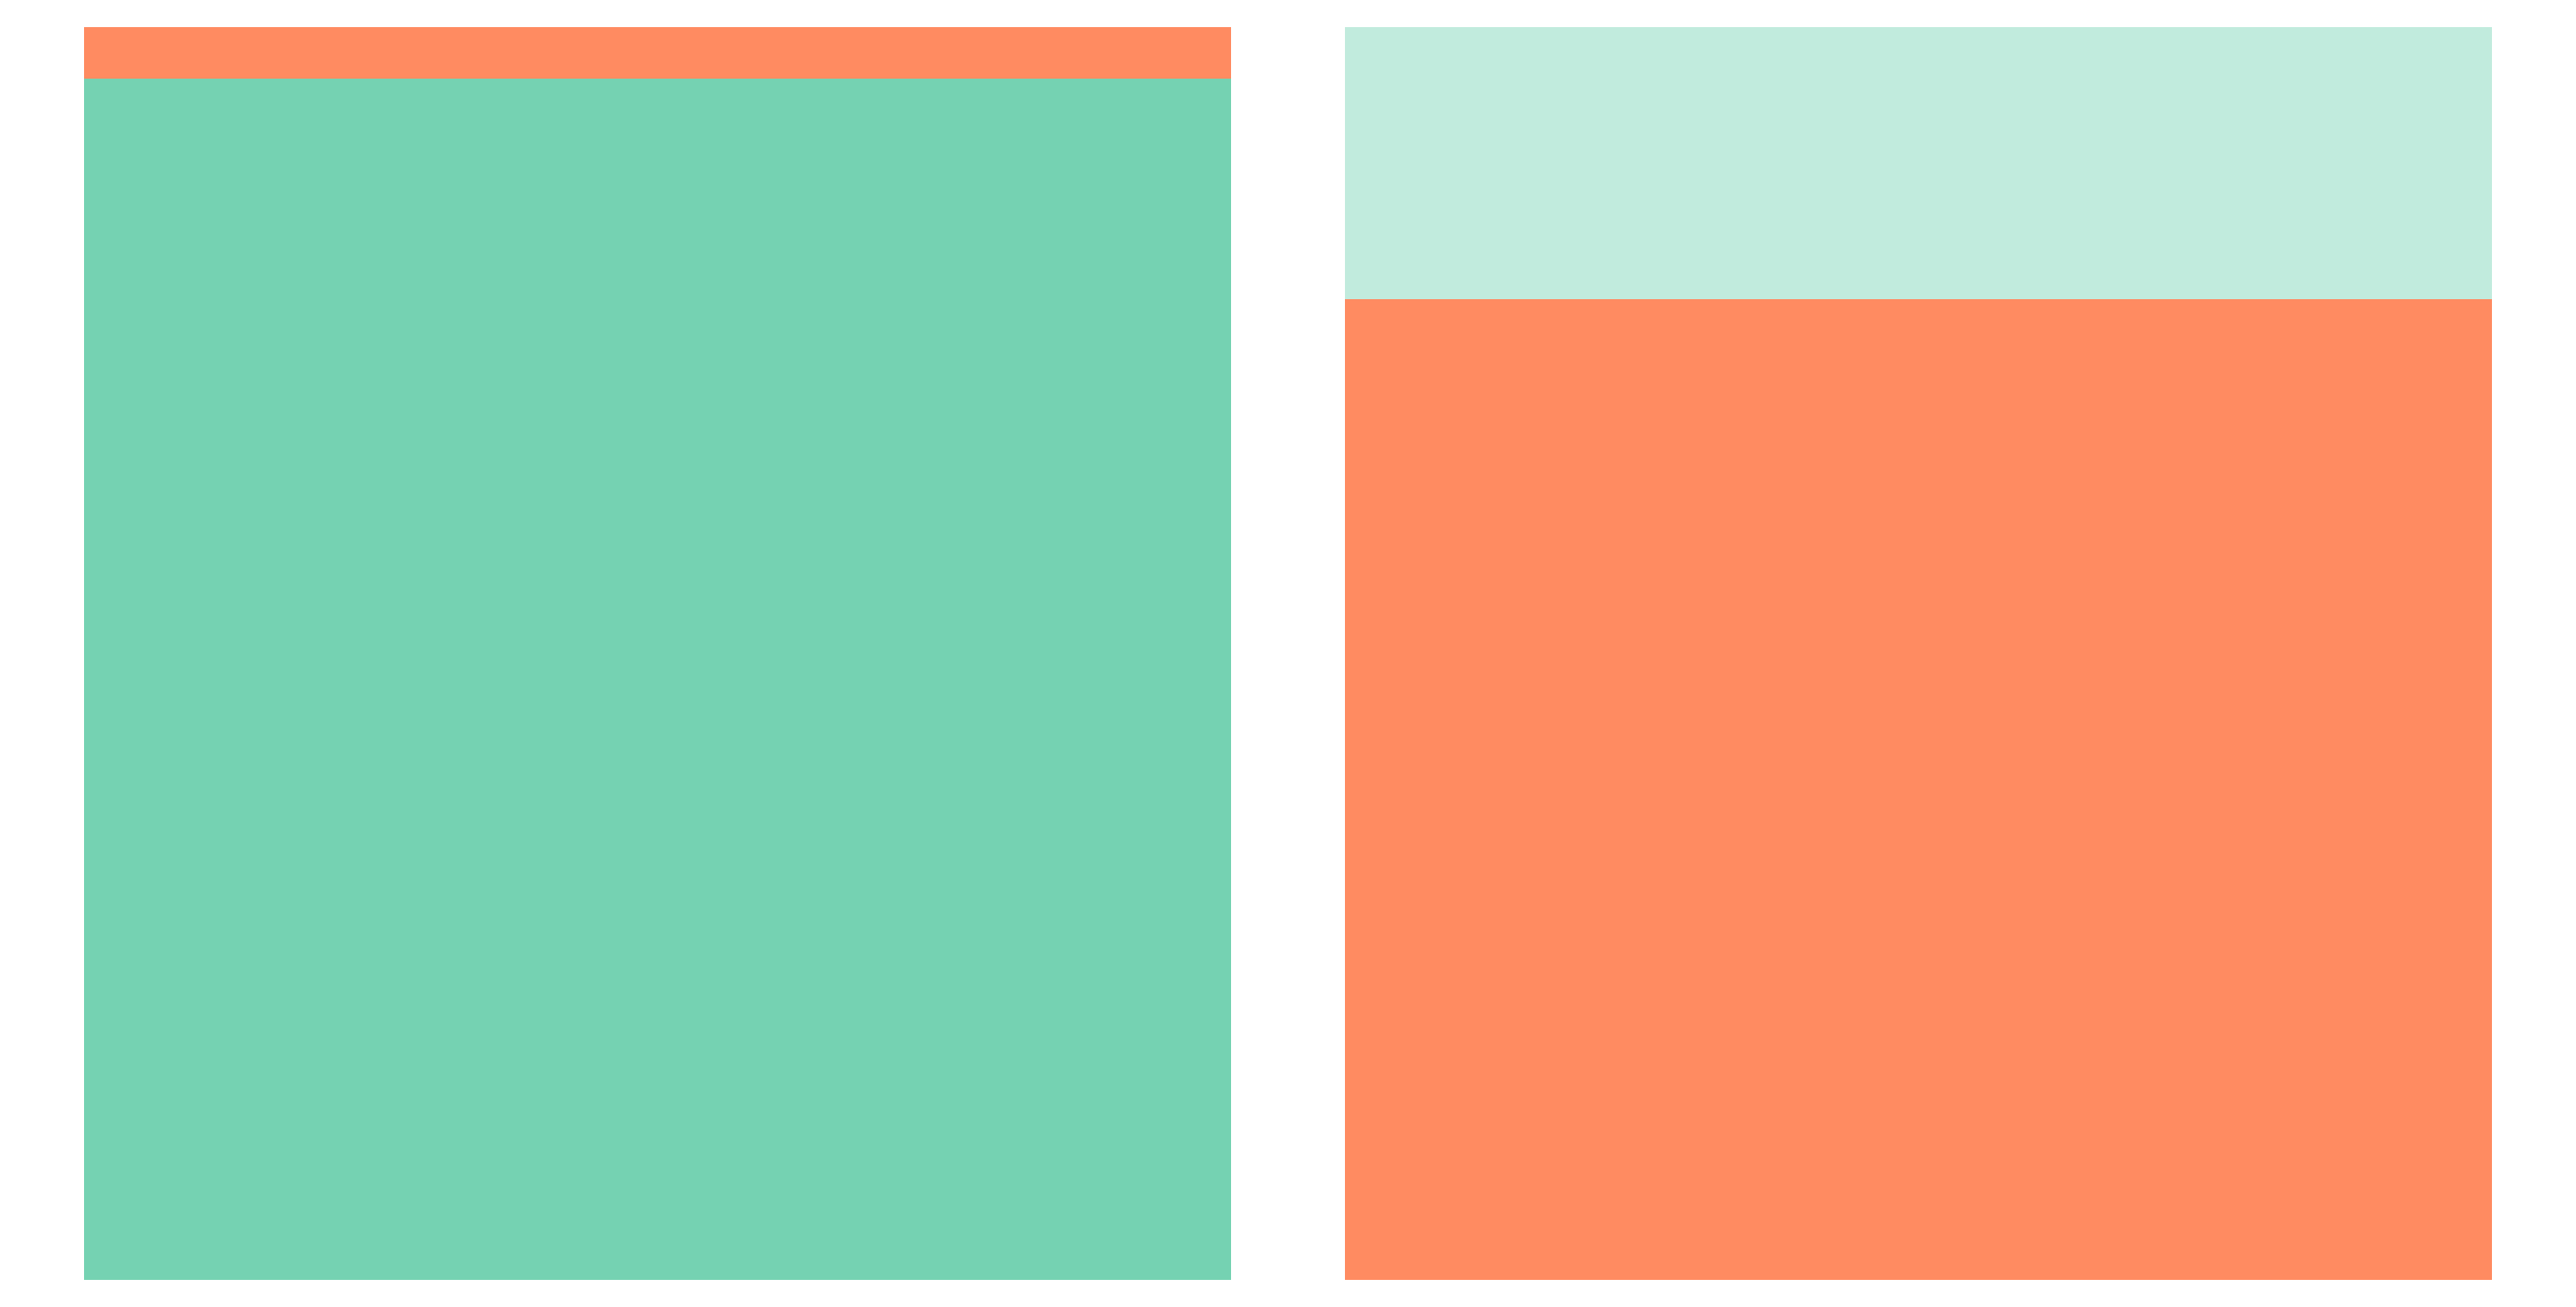

In [6]:
import matplotlib.pyplot as plt

# Create figure and assign axis objects
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), dpi=300)
fig.subplots_adjust(wspace=0)

# Data for the first stacked bar chart (simulating the pie chart)
overall_ratios = [1 - 0.04135224347314195, 0.04135224347314195]
overall_labels = ['Dislike either', 'Like Both']

# Creating the first stacked bar chart
ax1.bar(0, overall_ratios[0], color='mediumaquamarine', label=overall_labels[0], alpha=0.9)
ax1.bar(0, overall_ratios[1], bottom=overall_ratios[0], color='coral', label=overall_labels[1], alpha=0.9)

# Data for the second stacked bar chart
age_ratios = [0.7829537826953553, 1 - 0.7829537826953553]
age_labels = ['Dislike', 'Like']
bottom = 0

# Creating the second stacked bar chart
for j, (height, label) in enumerate(zip(age_ratios, age_labels)):
    ax2.bar(0, height, bottom=bottom, color='coral' if j == 0 else 'mediumaquamarine', label=label, alpha=0.9 - 0.5 * j)
    bottom += height

# Remove ticks and labels
for ax in (ax1, ax2):
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_ylim(0, 1)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

# Save as SVG
plt.savefig('stacked_bars.svg', format='svg', bbox_inches='tight')
plt.show()


In [7]:
attrlen=[]
for user,visList in user2Vis.items():
	if user in user2AttrAll.keys():
		attrlen.append(len(user2AttrAll[user]))
len(attrlen)

614

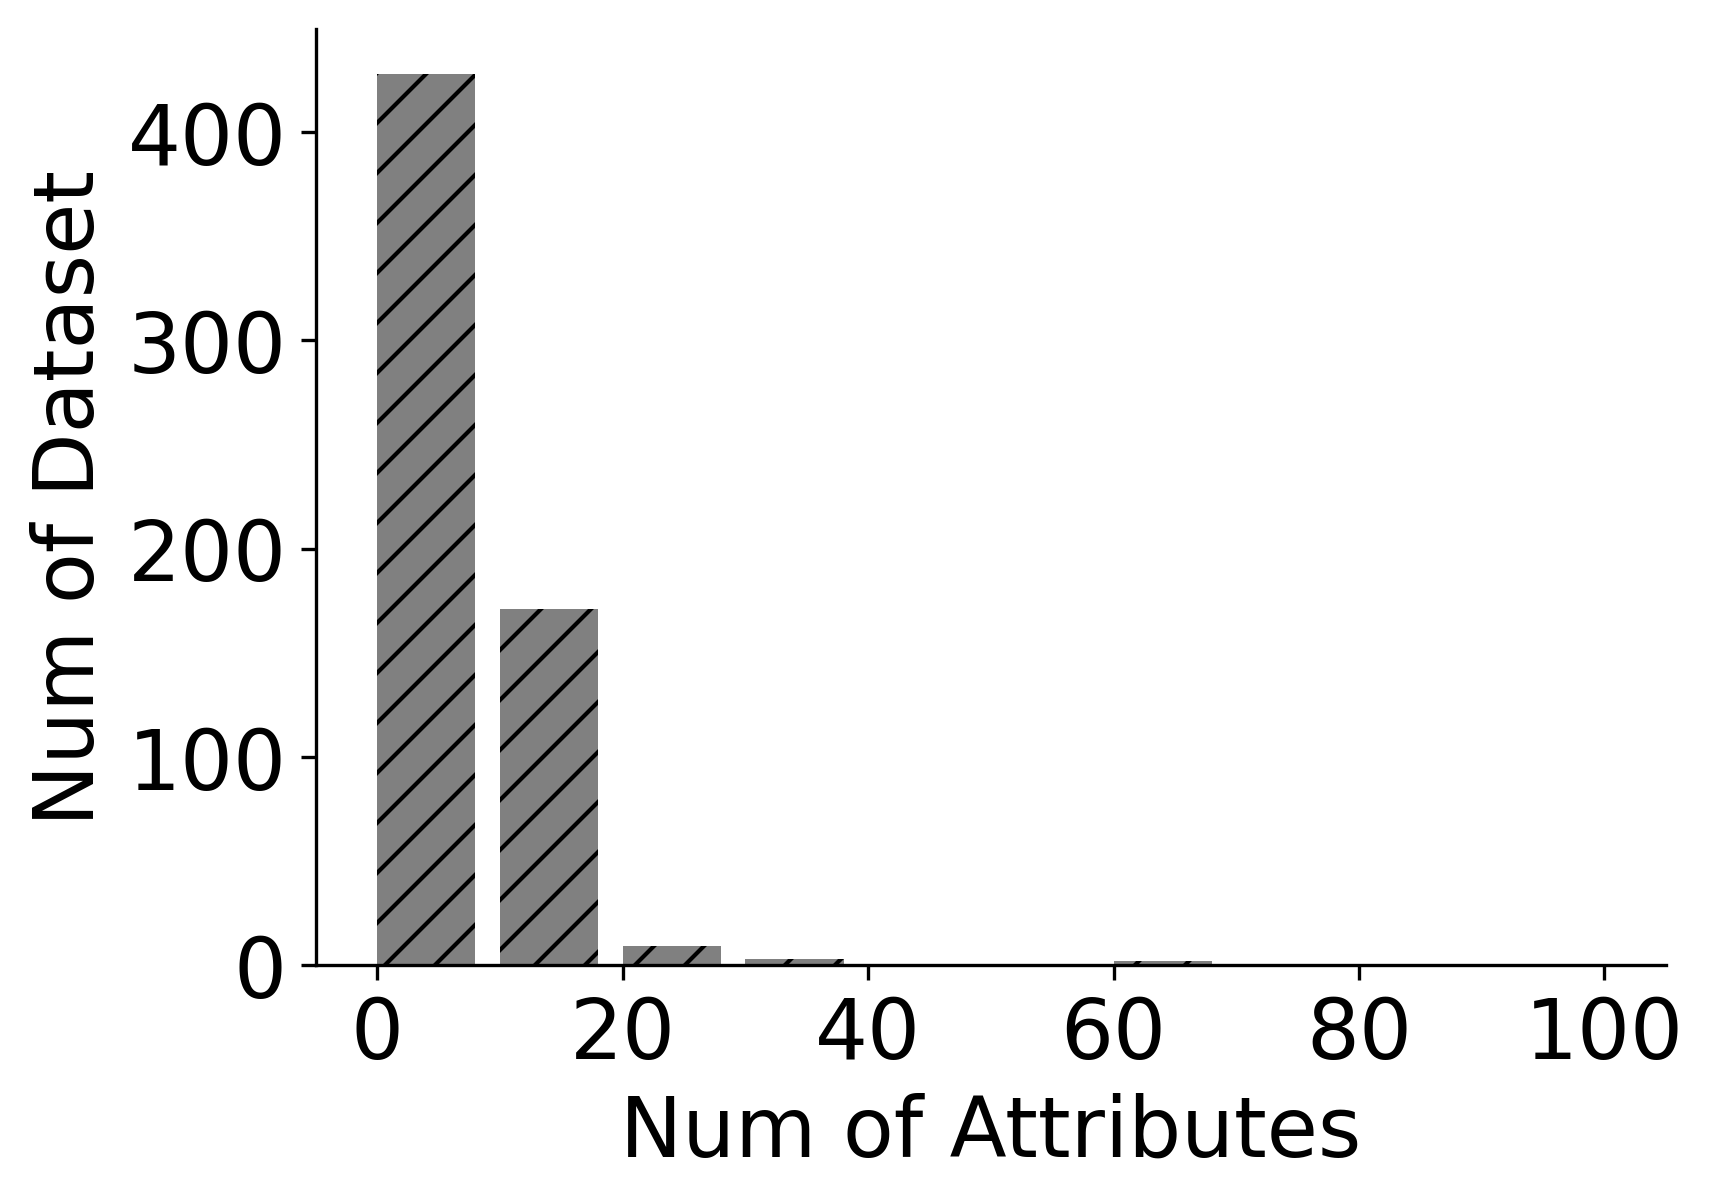

In [38]:
plt.figure(figsize=(6, 4), dpi=300)
plt.subplots_adjust(left=0.2, right=0.95, bottom=0.2, top=0.98)

# Create the histogram with 10 bins
plt.hist(attrlen, bins=10, range=[0, 100], color='grey',hatch='//', width=8)
# Remove all ticks and hide the top x-axis and right y-axis
plt.tick_params(left=True, bottom=True, right=False, top=False, 
                labelleft=True, labelbottom=True, labelright=False, labeltop=False)
plt.yticks(range(0,401,100))
# Draw only the left y-axis and bottom x-axis
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Setting labels with the desired font size
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Num of Attributes', fontsize=20)
plt.ylabel('Num of Dataset', fontsize=20)
# Save the plot as an SVG file
plt.savefig('hist.pdf')

# Optionally, show the plot
plt.show()


In [9]:
with open('arrName2vec.pkl','rb') as f:
	f1=pickle.load(f)

FileNotFoundError: [Errno 2] No such file or directory: 'arrName2vec.pkl'

In [ ]:
from collections import defaultdict
with open('username_variable_mapping_list.pkl','rb') as f:
	f2=pickle.load(f)
user2Attr=defaultdict(list)
for uid, attr in f2:
	temp=re.split('.csv_',attr)
	tempAttr=temp[0]+':'+temp[1]
	user2Attr[uid].append(tempAttr)
#change '.cxv_' to : there
user2Attr=dict(user2Attr)
user2Attr
#isha.tasfia:5:65cc21	

: 

In [ ]:
with open('arrName2vec.pkl','rb') as f:
	arrName2vec=pickle.load(f)
attr2Vec={}
for attr,vec in arrName2vec.items():
	temp=re.split('.csv_',attr)
	tempAttr=temp[0]+':'+temp[1]
	attr2Vec[tempAttr]=vec
attr2Vec



: 

In [ ]:
with open('attr2Vec.pkl','wb') as f:
	pickle.dump(attr2Vec,f)

: 

In [ ]:
with open('user2AttrAll.pkl','wb') as f:
	pickle.dump(user2Attr,f)

: 

In [ ]:
with open('user2Vis.pkl','rb') as f:
	user2Vis=pickle.load(f)
user2Vis

: 

In [ ]:
userLikeATTR={}
userLikeCFG={}
for user, vislist in user2Vis.items():
	LikeATTR=[]
	LikeCFG=[]
	for vis in vislist:
		LikeATTR.append(vis[0])
		LikeATTR.append(vis[1])
		LikeCFG.append(vis[2])
	userLikeATTR[user]=list(set(LikeATTR))
	userLikeCFG[user]=list(set(LikeCFG))

: 

In [ ]:
with open('userLikeATTR.pkl','wb') as f:
	pickle.dump(userLikeATTR,f)
with open('userLikeCFG.pkl','wb') as f:
	pickle.dump(userLikeCFG,f)

: 